In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [7]:
from sklearn import preprocessing

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [9]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [12]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [14]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\Alvin Tu\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Alvin Tu\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Alvin Tu\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Alvin Tu\Anaconda3\lib\site-packages\tensorflow\python\framewo

In [15]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [16]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 116us/step - loss: 0.7027 - accuracy: 0.4932 - val_loss: 0.6993 - val_accuracy: 0.4977
Epoch 2/100
1022/1022 [==============================] - 0s 27us/step - loss: 0.6954 - accuracy: 0.4990 - val_loss: 0.6933 - val_accuracy: 0.5114
Epoch 3/100
1022/1022 [==============================] - 0s 25us/step - loss: 0.6901 - accuracy: 0.5988 - val_loss: 0.6886 - val_accuracy: 0.6210
Epoch 4/100
1022/1022 [==============================] - 0s 25us/step - loss: 0.6859 - accuracy: 0.5724 - val_loss: 0.6847 - val_accuracy: 0.5297
Epoch 5/100
1022/1022 [==============================] - 0s 23us/step - loss: 0.6823 - accuracy: 0.5431 - val_loss: 0.6812 - val_accuracy: 0.5023
Epoch 6/100
1022/1022 [==============================] - 0s 29us/step - loss: 0.6789 - accuracy: 0.5166 - val_loss: 0.6779 - val_accuracy: 0.5023
Epoch 7/100
1022/1022 [==============================] - 0s 34us/step - los

1022/1022 [==============================] - 0s 27us/step - loss: 0.3730 - accuracy: 0.8620 - val_loss: 0.3493 - val_accuracy: 0.8858
Epoch 56/100
1022/1022 [==============================] - 0s 28us/step - loss: 0.3691 - accuracy: 0.8640 - val_loss: 0.3445 - val_accuracy: 0.8904
Epoch 57/100
1022/1022 [==============================] - 0s 24us/step - loss: 0.3648 - accuracy: 0.8669 - val_loss: 0.3405 - val_accuracy: 0.8904
Epoch 58/100
1022/1022 [==============================] - 0s 25us/step - loss: 0.3610 - accuracy: 0.8591 - val_loss: 0.3363 - val_accuracy: 0.8858
Epoch 59/100
1022/1022 [==============================] - 0s 29us/step - loss: 0.3577 - accuracy: 0.8689 - val_loss: 0.3322 - val_accuracy: 0.8950
Epoch 60/100
1022/1022 [==============================] - 0s 25us/step - loss: 0.3546 - accuracy: 0.8689 - val_loss: 0.3283 - val_accuracy: 0.8904
Epoch 61/100
1022/1022 [==============================] - 0s 25us/step - loss: 0.3511 - accuracy: 0.8728 - val_loss: 0.3253 - val_a

In [18]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 23us/step


0.8949771523475647

In [19]:
import matplotlib.pyplot as plt

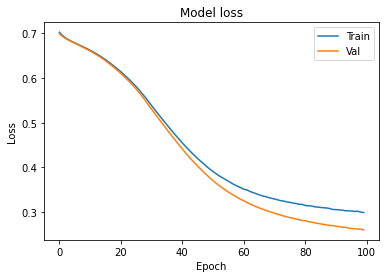

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

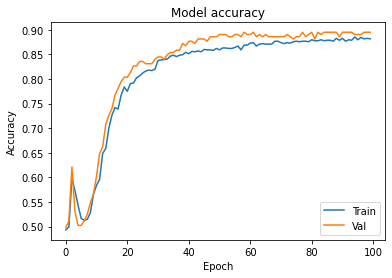

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [23]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.5005 - accuracy: 0.7534 - val_loss: 0.3330 - val_accuracy: 0.8767
Epoch 2/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3851 - accuracy: 0.8346 - val_loss: 0.2732 - val_accuracy: 0.8995
Epoch 3/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3166 - accuracy: 0.8650 - val_loss: 0.2472 - val_accuracy: 0.8950
Epoch 4/100
1022/1022 [==============================] - 1s 938us/step - loss: 0.3001 - accuracy: 0.8748 - val_loss: 0.2326 - val_accuracy: 0.8950
Epoch 5/100
1022/1022 [==============================] - 1s 923us/step - loss: 0.2951 - accuracy: 0.8845 - val_loss: 0.2184 - val_accuracy: 0.8995
Epoch 6/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2786 - accuracy: 0.8963 - val_loss: 0.2292 - val_accuracy: 0.9041
Epoch 7/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.

1022/1022 [==============================] - 1s 922us/step - loss: 0.1676 - accuracy: 0.9393 - val_loss: 0.2572 - val_accuracy: 0.8995
Epoch 57/100
1022/1022 [==============================] - 1s 934us/step - loss: 0.1516 - accuracy: 0.9403 - val_loss: 0.2870 - val_accuracy: 0.8904
Epoch 58/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1499 - accuracy: 0.9423 - val_loss: 0.2616 - val_accuracy: 0.9087
Epoch 59/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1517 - accuracy: 0.9393 - val_loss: 0.2557 - val_accuracy: 0.8950
Epoch 60/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1655 - accuracy: 0.9344 - val_loss: 0.2992 - val_accuracy: 0.8950
Epoch 61/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1928 - accuracy: 0.9207 - val_loss: 0.2883 - val_accuracy: 0.8767
Epoch 62/100
1022/1022 [==============================] - 1s 937us/step - loss: 0.1850 - accuracy: 0.9295 - val_loss: 0.2415 - val_ac

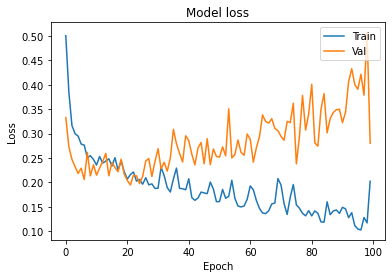

In [24]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

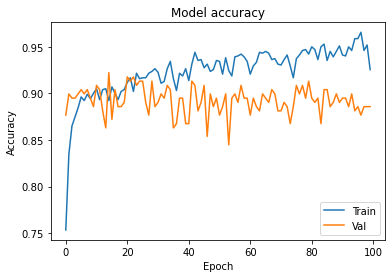

In [27]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [28]:
from keras.layers import Dropout
from keras import regularizers

In [29]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [30]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 14.2731 - accuracy: 0.6409 - val_loss: 3.9144 - val_accuracy: 0.8447
Epoch 2/100
1022/1022 [==============================] - 1s 1ms/step - loss: 1.6896 - accuracy: 0.8268 - val_loss: 0.6645 - val_accuracy: 0.8721
Epoch 3/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.5787 - accuracy: 0.8581 - val_loss: 0.4727 - val_accuracy: 0.8950
Epoch 4/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.5265 - accuracy: 0.8581 - val_loss: 0.5004 - val_accuracy: 0.8539
Epoch 5/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.5186 - accuracy: 0.8611 - val_loss: 0.4376 - val_accuracy: 0.9041
Epoch 6/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.5147 - accuracy: 0.8474 - val_loss: 0.4678 - val_accuracy: 0.8767
Epoch 7/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.507

Epoch 57/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4506 - accuracy: 0.8777 - val_loss: 0.4039 - val_accuracy: 0.8995
Epoch 58/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4340 - accuracy: 0.8826 - val_loss: 0.3873 - val_accuracy: 0.9178
Epoch 59/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4396 - accuracy: 0.8748 - val_loss: 0.4011 - val_accuracy: 0.9087
Epoch 60/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4668 - accuracy: 0.8640 - val_loss: 0.3933 - val_accuracy: 0.9224
Epoch 61/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4545 - accuracy: 0.8806 - val_loss: 0.3977 - val_accuracy: 0.9132
Epoch 62/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4532 - accuracy: 0.8767 - val_loss: 0.4130 - val_accuracy: 0.8950
Epoch 63/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4360 - accuracy: 0.8855 - val_loss: 0.3885 -

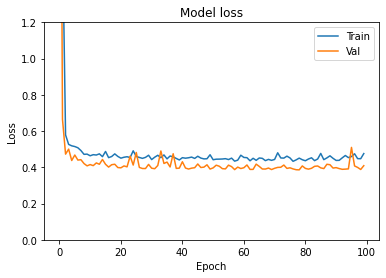

In [31]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

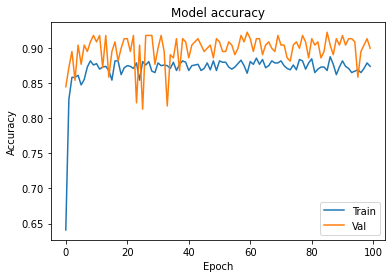

In [32]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [34]:
model_squared = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [35]:
model_squared.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [36]:
hist_squared = model_squared.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 210us/step - loss: 0.6837 - accuracy: 0.5137 - val_loss: 0.6212 - val_accuracy: 0.5023
Epoch 2/100
1022/1022 [==============================] - 0s 41us/step - loss: 0.5755 - accuracy: 0.5264 - val_loss: 0.5252 - val_accuracy: 0.5205
Epoch 3/100
1022/1022 [==============================] - 0s 37us/step - loss: 0.4894 - accuracy: 0.5724 - val_loss: 0.4526 - val_accuracy: 0.5936
Epoch 4/100
1022/1022 [==============================] - 0s 34us/step - loss: 0.4259 - accuracy: 0.6096 - val_loss: 0.3973 - val_accuracy: 0.6530
Epoch 5/100
1022/1022 [==============================] - 0s 34us/step - loss: 0.3771 - accuracy: 0.6272 - val_loss: 0.3552 - val_accuracy: 0.7078
Epoch 6/100
1022/1022 [==============================] - 0s 35us/step - loss: 0.3400 - accuracy: 0.6937 - val_loss: 0.3236 - val_accuracy: 0.7626
Epoch 7/100
1022/1022 [==============================] - 0s 30us/step - loss

1022/1022 [==============================] - 0s 31us/step - loss: 0.2072 - accuracy: 0.8562 - val_loss: 0.1950 - val_accuracy: 0.9041
Epoch 57/100
1022/1022 [==============================] - 0s 33us/step - loss: 0.2083 - accuracy: 0.8552 - val_loss: 0.1949 - val_accuracy: 0.9132
Epoch 58/100
1022/1022 [==============================] - 0s 32us/step - loss: 0.2021 - accuracy: 0.8669 - val_loss: 0.1948 - val_accuracy: 0.9041
Epoch 59/100
1022/1022 [==============================] - 0s 30us/step - loss: 0.2072 - accuracy: 0.8474 - val_loss: 0.1945 - val_accuracy: 0.9132
Epoch 60/100
1022/1022 [==============================] - 0s 32us/step - loss: 0.2076 - accuracy: 0.8581 - val_loss: 0.1944 - val_accuracy: 0.9132
Epoch 61/100
1022/1022 [==============================] - 0s 31us/step - loss: 0.2071 - accuracy: 0.8493 - val_loss: 0.1945 - val_accuracy: 0.9132
Epoch 62/100
1022/1022 [==============================] - 0s 31us/step - loss: 0.2089 - accuracy: 0.8620 - val_loss: 0.1955 - val_a

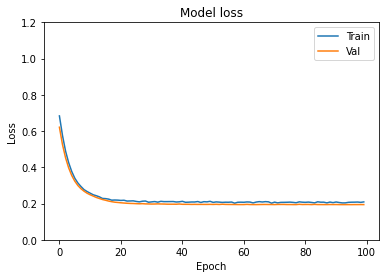

In [37]:
plt.plot(hist_squared.history['loss'])
plt.plot(hist_squared.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

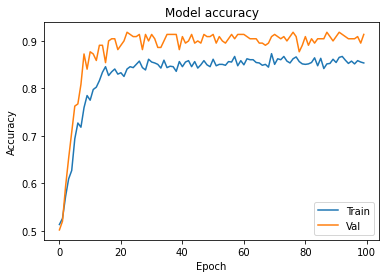

In [38]:
plt.plot(hist_squared.history['accuracy'])
plt.plot(hist_squared.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [44]:
model_absolute = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [45]:
model_absolute.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['accuracy'])

In [46]:
hist_absolute = model_absolute.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 230us/step - loss: 0.9173 - accuracy: 0.4971 - val_loss: 0.8542 - val_accuracy: 0.5023
Epoch 2/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.8076 - accuracy: 0.5274 - val_loss: 0.7603 - val_accuracy: 0.5023
Epoch 3/100
1022/1022 [==============================] - 0s 37us/step - loss: 0.7225 - accuracy: 0.5176 - val_loss: 0.6883 - val_accuracy: 0.5023
Epoch 4/100
1022/1022 [==============================] - 0s 35us/step - loss: 0.6602 - accuracy: 0.5391 - val_loss: 0.6322 - val_accuracy: 0.5068
Epoch 5/100
1022/1022 [==============================] - 0s 36us/step - loss: 0.6098 - accuracy: 0.5558 - val_loss: 0.5888 - val_accuracy: 0.5068
Epoch 6/100
1022/1022 [==============================] - 0s 34us/step - loss: 0.5742 - accuracy: 0.5734 - val_loss: 0.5543 - val_accuracy: 0.5342
Epoch 7/100
1022/1022 [==============================] - 0s 35us/step - loss

1022/1022 [==============================] - 0s 44us/step - loss: 0.3535 - accuracy: 0.8611 - val_loss: 0.3337 - val_accuracy: 0.9041
Epoch 57/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.3500 - accuracy: 0.8620 - val_loss: 0.3314 - val_accuracy: 0.9132
Epoch 58/100
1022/1022 [==============================] - 0s 36us/step - loss: 0.3509 - accuracy: 0.8571 - val_loss: 0.3314 - val_accuracy: 0.9087
Epoch 59/100
1022/1022 [==============================] - 0s 34us/step - loss: 0.3548 - accuracy: 0.8581 - val_loss: 0.3312 - val_accuracy: 0.9087
Epoch 60/100
1022/1022 [==============================] - 0s 34us/step - loss: 0.3557 - accuracy: 0.8532 - val_loss: 0.3317 - val_accuracy: 0.8904
Epoch 61/100
1022/1022 [==============================] - 0s 34us/step - loss: 0.3510 - accuracy: 0.8552 - val_loss: 0.3313 - val_accuracy: 0.9087
Epoch 62/100
1022/1022 [==============================] - 0s 36us/step - loss: 0.3486 - accuracy: 0.8503 - val_loss: 0.3344 - val_a

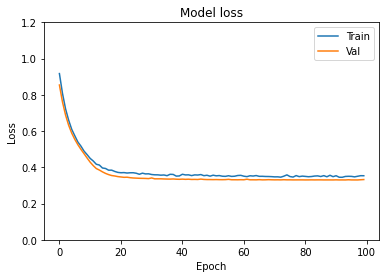

In [47]:
plt.plot(hist_absolute.history['loss'])
plt.plot(hist_absolute.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

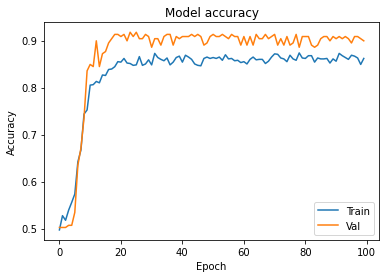

In [48]:
plt.plot(hist_absolute.history['accuracy'])
plt.plot(hist_absolute.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()